In [2]:
import numpy as np

In [3]:
np.random.randint(0, 100, size=(3, 4))

array([[ 9, 34, 49, 62],
       [19, 27, 79, 78],
       [ 7,  5, 52, 17]], dtype=int32)

# Binning or desctitization and Binirization 


In [4]:
# binning is the process of grouping a set of data points into bins or intervals.
# this is often used in data analysis to simplify the data and make it easier to visualize or analyze.
# for example, if you have a set of data points representing the ages of a group of people,
# you might want to group them into bins such as 0-10, 11-20, 21-30, etc.
# this can help you see the distribution of ages in the group and identify any patterns or trends.

# We use descritization to handel the outliers and to improve the value spread 

# types of the Binning 

# 1. unsupervisied Binning  -- i) Equal width 
#                               ii) Equal Frequency 
#                              iii) Kmeans 

# 2. supervisied Binning  -- Decision Tree Binning 

# 3. Custom binning 

In [5]:
# equal width binning: In this method, the range of the data is divided into equal-sized intervals or bins.

In [6]:
# equal width binning helps to handel the outliers in the data. 
# But it doesn't change the distribution of the data.

In [7]:
# Equal frequency binning: In this method, the data is divided into bins such that each bin contains approximately the same number of data points.
# This method is useful when the data is not uniformly distributed, as it ensures that each bin has a similar number of data points.


In [8]:
# k-means binning: This method uses the k-means clustering algorithm to group the data points into k clusters, where each cluster represents a bin.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer


In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-CompleteGuide/refs/heads/main/Titanic.csv",usecols=["Age","Fare","Survived"])


In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.dropna(inplace=True)


In [16]:
df.shape

(714, 3)

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [20]:
clf = DecisionTreeClassifier()

In [23]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without binning: {accuracy:}")

Accuracy without binning: 0.6223776223776224


In [24]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10,scoring='accuracy'))

np.float64(0.6288928012519561)

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')


In [26]:
def descretizer(bins,strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbins_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)


    trf = ColumnTransformer([
            ('age', kbin_age, ['Age']),
            ('fare', kbin_fare, ['Fare'])
        ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Befor")

    plt.subplot(122)
    plt.hist(x_trf[:, 0], color='orange')
    plt.title("After")  
    plt.show()
    

0.6723982785602504


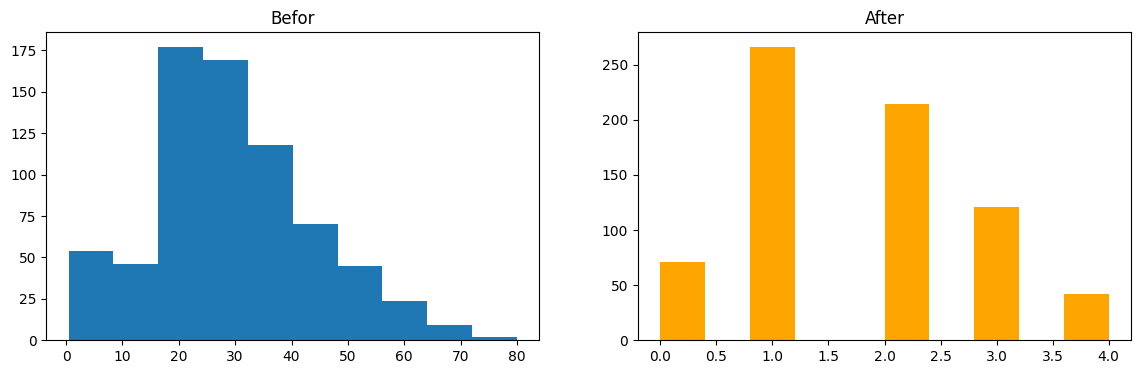

In [27]:
descretizer(5, 'kmeans')

# Binarization 

In [28]:
# Binarization is the process of converting continuous data into binary data.
# it id the form of discretization where the data is divided into two bins,
# one for values above a certain threshold and one for values below that threshold.

In [29]:
# in binarization, the data is transformed into a binary format, where each value is either 0 or 1.


In [30]:
from sklearn.preprocessing import Binarizer  

In [31]:
df2 = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-CompleteGuide/refs/heads/main/Titanic.csv",usecols=["Age","Fare","SibSp","Parch","Survived"])



In [34]:
df2.dropna(inplace=True)

In [35]:
df2.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [36]:
df2["family"] = df2["SibSp"] + df2["Parch"]

In [38]:
df2.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [39]:
df2.drop(columns=["SibSp","Parch"],inplace=True)

In [41]:
df2.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [48]:
X = df2.drop(columns=["Survived"])
y = df2["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# without binarization
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without binarization: {accuracy:.2f}")
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

Accuracy without binarization: 0.62


np.float64(0.6499413145539906)

In [50]:
# Applying binarization
trf = ColumnTransformer([
    ('bin',Binarizer(copy=True), ['family'])
],remainder='passthrough')

In [51]:
X_train_trf = trf.fit_transform(x_train)
X_test_trf = trf.transform(x_test)

In [52]:
pd.DataFrame(X_train_trf, columns=['family', 'Age', 'Fare']).head( )


,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000


In [53]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy with binarization: {accuracy2:.2f}")
x_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv=10, scoring='accuracy'))


Accuracy with binarization: 0.62


np.float64(0.6233763693270735)